# 1. Generate binary mask for target clothing image C

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# encoder_model 1
def encoder_model1(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder layers
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Intermediate upsampling layers
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((4, 4))(x)

    # Output layer
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

In [ ]:
# encoder_model 2

def encoder_model2(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder layers
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Intermediate upsampling layers
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    # Output layer
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

In [ ]:
# encoder model 3

def encoder_model3(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder layers
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Intermediate convolutional layers with increased filters
    x = layers.Conv2D(300, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(300, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(300, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Intermediate upsampling layers
    x = layers.Conv2D(500, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(500, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(250, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(250, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(100, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(100, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((4, 4))(x)

    # Output layer
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

In [ ]:
encoder3 = encoder_model3((256, 192, 3))
encoder3.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
# Create an instance of the encoder model
input_shape = (256, 192, 3)  # Set the input shape based on your dataset image dimensions
encoder = encoder_model3(input_shape)

# Compile the model
encoder.compile(optimizer=Adam(learning_rate=0.0012), loss='binary_crossentropy', metrics=["accuracy"])

# Print the model summary
encoder.summary()

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

cloth_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/viton_resize/test/cloth"
cloth_mask_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/viton_resize/test/cloth-mask"

input_shape = (256, 192)
batch_size = 16

cloth_files = os.listdir(cloth_dir)
cloth_mask_files = os.listdir(cloth_mask_dir)

num_samples = min(len(cloth_files), len(cloth_mask_files))

input_images = np.zeros((num_samples,) + input_shape + (3,))
target_masks = np.zeros((num_samples,) + input_shape + (1,))

for i in range(num_samples):
    cloth_file = os.path.join(cloth_dir, cloth_files[i])
    cloth_mask_file = os.path.join(cloth_mask_dir, cloth_mask_files[i])

    input_image = Image.open(cloth_file)
    target_mask = Image.open(cloth_mask_file).convert('L')

    input_images[i] = np.array(input_image)
    target_masks[i] = np.array(target_mask)[..., np.newaxis]
    # print(np.array(input_image).shape)
    # break

In [ ]:
# Create an ImageDataGenerator for the input images
input_data_generator = ImageDataGenerator(rescale=1/255)

# Create an ImageDataGenerator for the target masks
target_data_generator = ImageDataGenerator(rescale=1/255)

# Flow the images from numpy arrays using the generators
input_generator = input_data_generator.flow(input_images, batch_size=batch_size)
target_generator = target_data_generator.flow(target_masks, batch_size=batch_size)

# Combine the input and target generators
train_generator = zip(input_generator, target_generator)

# Train the model using the generator
epochs = 20
encoder.fit(train_generator, epochs=epochs, steps_per_epoch=len(input_images) // batch_size)

In [ ]:
# import numpy as np

# # Set values greater than 0.7 to 1, and 0 otherwise
# filtered_output = np.where(output > 0.7, 1, 0)

# plt.imshow(np.squeeze(filtered_output * sample))
# plt.show()

# 2. Generate Clothing Mask M

In [ ]:
# image_parse_path = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/viton_resize/test/image-parse/000074_0.png"
# image_parse = Image.open(image_parse_path)

# image_parse = np.array(image_parse)

In [ ]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [ ]:
# plt.imshow(image_parse == 5)
# plt.show()

# # top is 5

# Pre-trained Neural Style Transfer Network

## 0. Import Dependencies & Pretrained Model

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Convert the model to TensorFlow Lite format
concrete_func = model.signatures['serving_default']
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('/content/stylization_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
!ls

sample_data  stylization_model.tflite


In [ ]:
type(model)

tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject

## 1. Preprocess Image n Load

In [ ]:
def load_image(img_path, channels=3):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img,
                                # channels=channels
                                )
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [ ]:
content_image = load_image("/content/drive/MyDrive/Colab Notebooks/Capstone Project/profile.jfif")
style_image = load_image("/content/drive/MyDrive/Colab Notebooks/Capstone Project/monet.jpeg")

NotFoundError: ignored

In [ ]:
type()

In [ ]:
print(f"content_image dim: {content_image.shape}")
print(f"style_iamge dim: {style_image.shape}")

content_image dim: (1, 200, 200, 3)
style_iamge dim: (1, 221, 228, 3)


## 2. Visualize Output

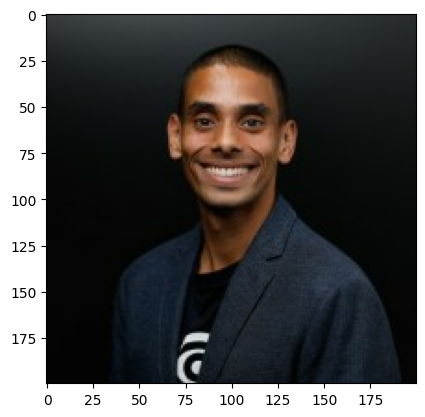

In [ ]:
plt.imshow(np.squeeze(content_image))
plt.show()

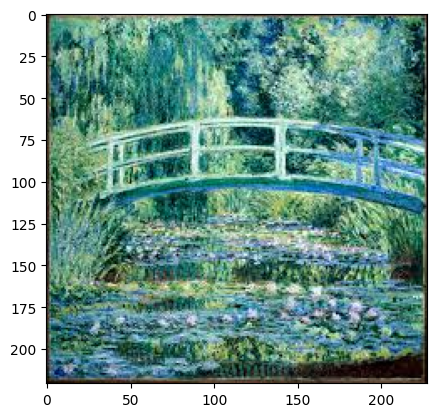

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

## 3. Stylize Image

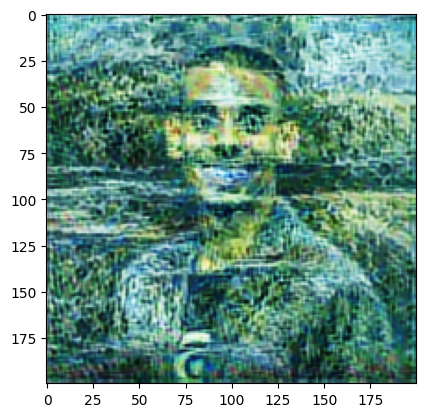

In [ ]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0][0]
plt.imshow(stylized_image)
plt.show()

# Binary Mask to find top area

## Create Binary Masks for Images

In [ ]:
import os
import numpy as np
from PIL import Image

# Define the paths to the input and output directories
input_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/viton_resize/test/image-parse"
output_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/viton_resize/test/image-parse-binary"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get a list of all the .png files in the input directory
file_list = sorted([file for file in os.listdir(input_dir) if file.endswith(".png")])

# Process each .png file
for file_name in file_list:
    # Construct the paths for the input and output files
    input_path = os.path.join(input_dir, file_name)
    output_path = os.path.join(output_dir, file_name)

    # Load the multiclass mask image
    mask = Image.open(input_path)

    # Convert to a numpy array
    mask_array = np.array(mask)

    # Create a binary mask by setting pixels equal to 5 to 255, and all others to 0. #EDITED
    binary_mask = np.where(mask_array == 5, 255, 0)

    # Convert the binary mask back to an image
    binary_mask_image = Image.fromarray(binary_mask.astype(np.uint8))

    # Save the binary mask image to the output directory
    binary_mask_image.save(output_path)

# Pre-Trained Model

## Pre req

In [ ]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

import tensorflow as tf
import segmentation_models as sm

print(f"tf version: {tf.__version__}")
print(f"keras version: {keras.__version__}")
print(f"segmentation_models version: {sm.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.0 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==2.2.1
ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0,

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

def load_image(img_path, channels=3):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img,
                                # channels=channels
                                )
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [ ]:
from segmentation_models import Unet
# from segmentation_models.losses import bce_jaccard_loss
# from segmentation_models.metrics import iou_score
from tensorflow.keras.optimizers import Adam

## User Image Encoder

### Load Data

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/viton_resize/test/image"
img_mask_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/viton_resize/test/image-parse-binary"

input_shape = (256, 192)
batch_size = 16

img_files = sorted(os.listdir(img_dir))
img_mask_files = sorted(os.listdir(img_mask_dir))

num_samples = min(len(img_files), len(img_mask_files))

input_images = np.zeros((num_samples,) + input_shape + (3,))
target_masks = np.zeros((num_samples,) + input_shape + (1,))

for i in range(num_samples):
    img_file = os.path.join(img_dir, img_files[i])
    img_mask_file = os.path.join(img_mask_dir, img_mask_files[i])

    input_image = Image.open(img_file)
    target_mask = Image.open(img_mask_file).convert('L')

    input_images[i] = np.array(input_image)
    target_masks[i] = np.array(target_mask)[..., np.newaxis]

In [ ]:
# Create an ImageDataGenerator for the input images
input_data_generator = ImageDataGenerator(rescale=1/255)

# Create an ImageDataGenerator for the target masks
target_data_generator = ImageDataGenerator(rescale=1/255)

# Flow the images from numpy arrays using the generators
input_generator = input_data_generator.flow(input_images, batch_size=batch_size)
target_generator = target_data_generator.flow(target_masks, batch_size=batch_size)

# Combine the input and target generators
user_img_train_generator = zip(input_generator, target_generator)

### User Image Encoder Model

In [ ]:
# Create the pretrained UNet model
user_img_enc = Unet(backbone_name='resnet34', input_shape=(256, 192, 3), classes=1, activation='sigmoid')

# Specify the number of layers to be trained
num_layers_to_train = 100

# Set the trainable attribute of the desired layers
for layer in user_img_enc.layers[:-num_layers_to_train]:
    layer.trainable = False

# Compile the model
user_img_enc.compile(optimizer=Adam(learning_rate=0.0011), loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
user_img_enc.summary()

In [ ]:
# fit
epochs = 15
batch_size = 16

user_img_enc.fit(user_img_train_generator, epochs=epochs, steps_per_epoch=len(input_images) // batch_size)

### Test Results

In [ ]:
sample = load_image("/content/drive/MyDrive/Colab Notebooks/Capstone Project/viton_resize/test/cloth/000192_1.jpg")
pred = user_img_enc.predict(sample)[0]

plt.imshow(pred)
plt.show()

### Save Model

In [ ]:
user_img_enc.save('/content/user_img_enc_model.h5')

### Download Model

In [ ]:
from google.colab import files

files.download('/content/user_img_enc_model.h5')

### Convert to TFLite Model

In [ ]:
import tensorflow as tf

# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(user_img_enc)
converter.experimental_new_converter = True
tflite_model = converter.convert()

converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

converter.allow_custom_ops = True

### Save TFLite Model

In [ ]:
# Save the TFLite model to a file
with open('/content/user_img_enc.tflite', 'wb') as f:
    f.write(tflite_model)

## Outfit Encoder

### Load Data

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/viton_resize/test/cloth"
img_mask_dir = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/viton_resize/test/cloth-mask"

input_shape = (256, 192)
batch_size = 16

img_files = sorted(os.listdir(img_dir))
img_mask_files = sorted(os.listdir(img_mask_dir))

num_samples = min(len(img_files), len(img_mask_files))

input_images = np.zeros((num_samples,) + input_shape + (3,))
target_masks = np.zeros((num_samples,) + input_shape + (1,))

for i in range(num_samples):
    img_file = os.path.join(img_dir, img_files[i])
    img_mask_file = os.path.join(img_mask_dir, img_mask_files[i])

    input_image = Image.open(img_file)
    target_mask = Image.open(img_mask_file).convert('L')

    input_images[i] = np.array(input_image)
    target_masks[i] = np.array(target_mask)[..., np.newaxis]

In [ ]:
# Create an ImageDataGenerator for the input images
input_data_generator = ImageDataGenerator(rescale=1/255)

# Create an ImageDataGenerator for the target masks
target_data_generator = ImageDataGenerator(rescale=1/255)

# Flow the images from numpy arrays using the generators
input_generator = input_data_generator.flow(input_images, batch_size=batch_size)
target_generator = target_data_generator.flow(target_masks, batch_size=batch_size)

# Combine the input and target generators
outfit_train_generator = zip(input_generator, target_generator)

### User Image Encoder Model

In [ ]:
# Create the pretrained UNet model
outfit_enc = Unet(backbone_name='resnet34', input_shape=(256, 192, 3), classes=1, activation='sigmoid')

# Specify the number of layers to be trained
num_layers_to_train = 50

# Set the trainable attribute of the desired layers
for layer in outfit_enc.layers[:-num_layers_to_train]:
    layer.trainable = False

# Compile the model
outfit_enc.compile(optimizer=Adam(learning_rate=0.0011), loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
outfit_enc.summary()

In [ ]:
# fit
epochs = 5
batch_size = 16

outfit_enc.fit(outfit_train_generator, epochs=epochs, steps_per_epoch=len(input_images) // batch_size)

Epoch 1/5
127/127 [==============================] - 40s 119ms/step - loss: 0.3909 - accuracy: 0.7818
Epoch 2/5
127/127 [==============================] - 15s 120ms/step - loss: 0.3697 - accuracy: 0.7929
Epoch 3/5
127/127 [==============================] - 15s 122ms/step - loss: 0.3690 - accuracy: 0.7933
Epoch 4/5
127/127 [==============================] - 16s 123ms/step - loss: 0.3680 - accuracy: 0.7936
Epoch 5/5
127/127 [==============================] - 16s 124ms/step - loss: 0.3675 - accuracy: 0.7939


In [ ]:
# save keras model
outfit_enc.save('/content/outfit_enc.h5')

In [ ]:
import tensorflow as tf

# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(outfit_enc)
converter.experimental_new_converter = True
tflite_model = converter.convert()

converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

converter.allow_custom_ops = True

In [ ]:
# Save the TFLite model to a file
with open('/content/outfit_enc.tflite', 'wb') as f:
    f.write(tflite_model)

#.

## Inference

In [ ]:
sample = load_image("/content/drive/MyDrive/Colab Notebooks/Capstone Project/viton_resize/test/cloth/000164_1.jpg")


output = encoder.predict(sample)
plt.imshow(np.squeeze(output))
plt.show()

plt.imshow(np.squeeze(sample))
plt.show()

plt.imshow(np.squeeze(output * sample))
plt.show()

# Others

- Using PIL's Image.open gives 0,1 255
- Using load_image (tf's read file) gives 0, 1

## Encoder without Skip connections

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def segmentation_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    # Decoder
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)

    up6 = layers.Conv2D(512, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(drop5))
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2D(256, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = layers.Conv2D(128, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.Conv2D(64, 2, activation='relu', padding='same')(layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Output
    outputs = layers.Conv2D(num_classes, 1, activation='softmax')(conv9)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

# Define the input shape and number of classes
input_shape = (256, 192, 3)  # Set the input shape based on your image dimensions
num_classes = 1  # Set the number of classes/categories in your segmented mask

# Create an instance of the segmentation model
segmentation_net = segmentation_model(input_shape, num_classes)

# Print the model summary
segmentation_net.summary()

## Encoder With Skip Connections

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def unet_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    encoder1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    encoder1 = layers.Conv2D(64, 3, activation='relu', padding='same')(encoder1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(encoder1)

    encoder2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    encoder2 = layers.Conv2D(128, 3, activation='relu', padding='same')(encoder2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(encoder2)

    encoder3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    encoder3 = layers.Conv2D(256, 3, activation='relu', padding='same')(encoder3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(encoder3)

    # Bridge
    bridge = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    bridge = layers.Conv2D(512, 3, activation='relu', padding='same')(bridge)

    # Decoder
    upconv3 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(bridge)
    concat3 = layers.concatenate([upconv3, encoder3])
    decoder3 = layers.Conv2D(256, 3, activation='relu', padding='same')(concat3)
    decoder3 = layers.Conv2D(256, 3, activation='relu', padding='same')(decoder3)

    upconv2 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(decoder3)
    concat2 = layers.concatenate([upconv2, encoder2])
    decoder2 = layers.Conv2D(128, 3, activation='relu', padding='same')(concat2)
    decoder2 = layers.Conv2D(128, 3, activation='relu', padding='same')(decoder2)

    upconv1 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(decoder2)
    concat1 = layers.concatenate([upconv1, encoder1])
    decoder1 = layers.Conv2D(64, 3, activation='relu', padding='same')(concat1)
    decoder1 = layers.Conv2D(64, 3, activation='relu', padding='same')(decoder1)

    # Output
    outputs = layers.Conv2D(num_classes, 1, activation='softmax')(decoder1)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model

In [ ]:
from tensorflow.keras.optimizers import Adam
# Define the input shape and number of classes
input_shape = (256, 192, 3)
num_classes = 1

# Create an instance of the UNet model
user_img_encoder = encoder_model2(input_shape)

# Compile the model
user_img_encoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=["accuracy"])

# Print the model summary
user_img_encoder.summary()